In [1]:
import h5py

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rfest import ASD, ALD
from rfest import get_stimulus_design_matrix, get_spatial_and_temporal_filters

## Load RGC calcium imaging data

In [2]:
with h5py.File('./data/RGC_dendrite.h5', 'r') as f:
    
    stimulus = np.array(f['stimulus'])
    response = np.array(f['response']) 
    
print("# rois = {}".format(response.shape[0]))

# rois = 19


In [3]:
roi_id = 0
dims = [5, 20, 15]
X = get_stimulus_design_matrix(stimulus, dims[0])
y = response[roi_id] 

## ASD

In [4]:
dims = (5,20,15)
asd = ASD(X, y, dims=dims)
asd.fit(p0=[1., 1., 2., 2.3, 2.3], num_iters=5)

/Users/ziweih/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/jax/lib/xla_bridge.py:114: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


Iter	σ	ρ	δt	δy	δx	cost
   0	1.010	0.990	2.010	2.310	2.310	2322.707
   1	1.013	0.986	2.015	2.319	2.307	2316.874
   2	1.016	0.981	2.022	2.327	2.303	2317.550
   3	1.022	0.974	2.029	2.335	2.305	2316.920
   4	1.024	0.970	2.031	2.342	2.309	2321.193
Stop: reached 5 steps, final cost=2321.19254.


## ALD

In [5]:
dims = (5,20,15)
ald = ALD(X, y, dims=dims)

sigma0 = [1.]
rho0 = [1.]
params_t0 = [2., 2., 1., 1.] # taus, nus, tauf, nuf
params_y0 = [2., 10., 1., 1.]
params_x0 = [2., 7.5, 1., 1.]
p0 = sigma0 + rho0 + params_t0 + params_y0 + params_x0
ald.fit(p0=p0, num_iters=5)
# parameters for nu are not printed.

* Due to space limit, parameters for ν are not printed.
Iter	σ	ρ	τs_t	τf_t	τs_y	τf_y	τs_x	τf_x	cost
   0	0.990	0.990	1.990	1.010	1.990	1.010	1.990	1.010	-2333.260
   1	0.980	0.982	1.982	1.017	1.980	1.020	1.980	1.020	-2489.096
   2	0.970	0.975	1.975	1.023	1.970	1.030	1.970	1.030	-2634.061
   3	0.960	0.968	1.968	1.030	1.961	1.040	1.961	1.040	-2772.854
   4	0.950	0.961	1.961	1.037	1.952	1.050	1.951	1.050	-2912.750
Stop: reached 5 steps, final cost=-2912.75007.


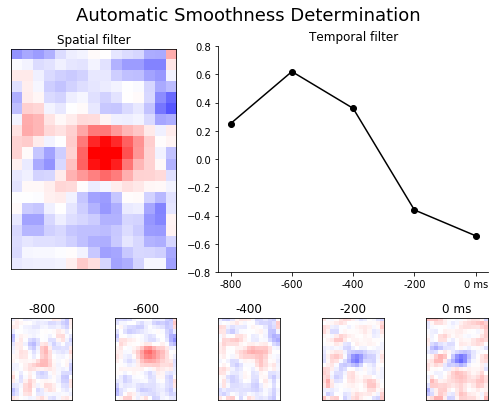

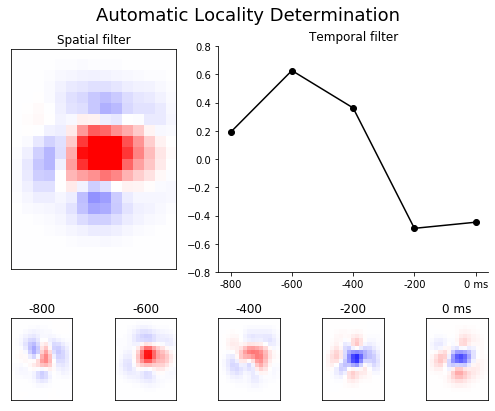

In [6]:
def plot_RF(k, dims, title=''):
    
    import matplotlib.gridspec as gridspec
    
    k_norm = k / np.linalg.norm(k)
    
    sRF, tRF = get_spatial_and_temporal_filters(k_norm, dims)
    
    fig = plt.figure(figsize=(7,6))
    spec = gridspec.GridSpec(ncols=5, nrows=3, figure=fig)
    ax0 = fig.add_subplot(spec[:2, :2])
    ax0.imshow(sRF, origin='lower', cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2)
    ax0.set_title('Spatial filter')
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax1 = fig.add_subplot(spec[:2, 2:])
    
    labels = ['-800', '-600', '-400', '-200', '0 ms']
    ax1.plot(labels, tRF, 'ko-')
    ax1.set_ylim(-0.8, 0.8)
    ax1.set_title('Temporal filter')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    for i in range(dims[0]):
        ax = fig.add_subplot(spec[2, i])
        ax.imshow(k_norm.reshape(dims)[i], origin='lower', cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2)
        ax.set_title(labels[i])
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig.suptitle(title, fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plot_RF(asd.w_opt, dims, 'Automatic Smoothness Determination')
plot_RF(ald.w_opt, dims, 'Automatic Locality Determination')